In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data= pd.read_csv("C:\\Users\\Harshavardhan\\Downloads\\adult.csv")


In [30]:
df=data.copy()

In [31]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [32]:
#df.drop(['fnlwgt','capital-gain','capital-loss'],axis=1,inplace=True)

In [33]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [35]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [36]:
df.shape

(32561, 15)

In [37]:
#cleaning string in object columns
for i in df.columns:
    if df[i].dtype=='object':
        df[i] = df[i].str.strip()

In [38]:
#encoding income column
#df['income']=df['income'].replace('<=50K',0)
df['income']=df['income'].replace('>50K',1)

In [39]:
#people whose earning less than 50K
df[df['income']==0].shape

(0, 15)

In [40]:
#people whose earning more than 50K
df[df['income']==1].shape

(7841, 15)

In [41]:
#cleaning rows
l=[]
for i in df.columns:
    for j in range(df.shape[0]):
        if df[i][j]=='?':
            l.append(j)
df.drop(index=l,inplace=True)
print(len(l))

4262


In [42]:
# x['workclass']=x['workclass'].fillna(x['workclass'].mode(),axis=0)

In [43]:
# x['occupation']=x['occupation'].fillna(x['occupation'].mode(),axis=0)

In [44]:
# x['native.country']=x['native.country'].fillna((x['native.country'].mode()),inplace=True)

In [45]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [46]:

#doing private job and income more than 50K
new_df=df[df['workclass']=='Private']
print(len(new_df[new_df['income']==1]))
new_df[new_df['income']==1].head(2)

4876


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,1
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,1


<AxesSubplot:xlabel='income'>

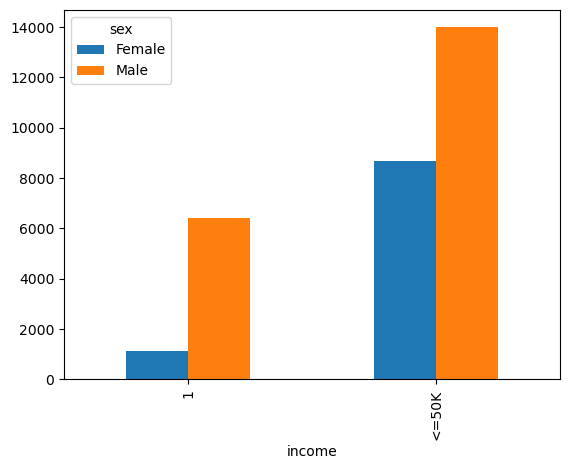

In [47]:
#cheacking male and female ration according to their income
class_sex = pd.crosstab(df['income'],df['sex'])
class_sex.plot(kind='bar')

In [48]:
df['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [49]:
#how many of people whose age above average earn more than 50K
avg_age = df[df['age']>38]
print(len(avg_age[avg_age['income']==1]))
avg_age[avg_age['income']==1].head(2)

5042


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,1


In [50]:
#how many of people whose age above avarge earn less than 50K
avg_age = df[df['age']>38]
print(len(avg_age[avg_age['income']==0]))
avg_age[avg_age['income']==0].head(2)

0


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


<AxesSubplot:xlabel='income'>

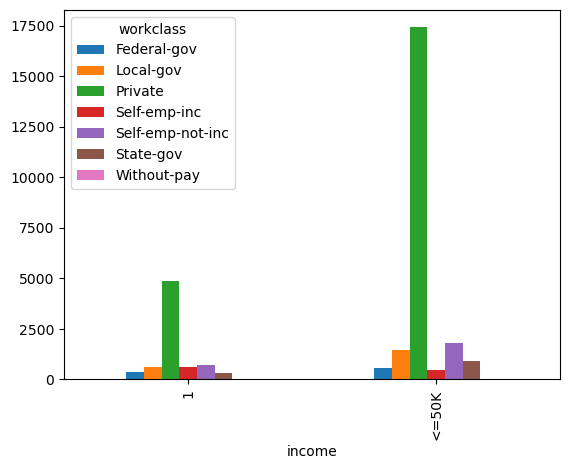

In [51]:
#checking distribution of people in workclass according to income
class_income = pd.crosstab(df['income'],df['workclass'])
class_income.plot(kind='bar')

<AxesSubplot:xlabel='education'>

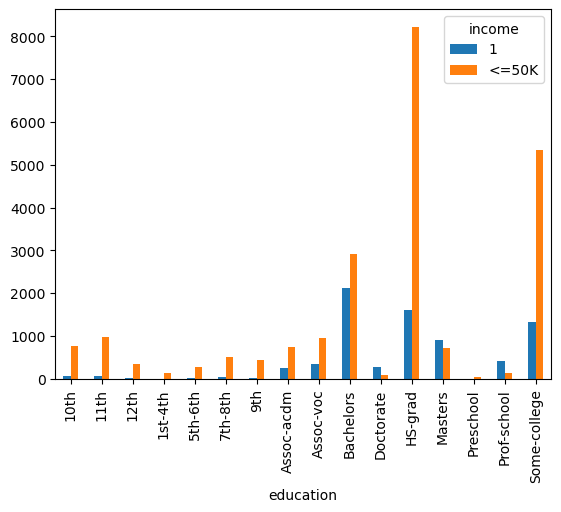

In [52]:
#checking distribution of people according to income
income_education = pd.crosstab(df['education'],df['income'])
income_education.plot(kind='bar')

In [53]:
#numeric columns
num_col=[]
for i in df.columns:
    if df[i].dtype=='int64':
        num_col.append(i)

        
num_col = num_col[0:2]
num_col 

['age', 'fnlwgt']

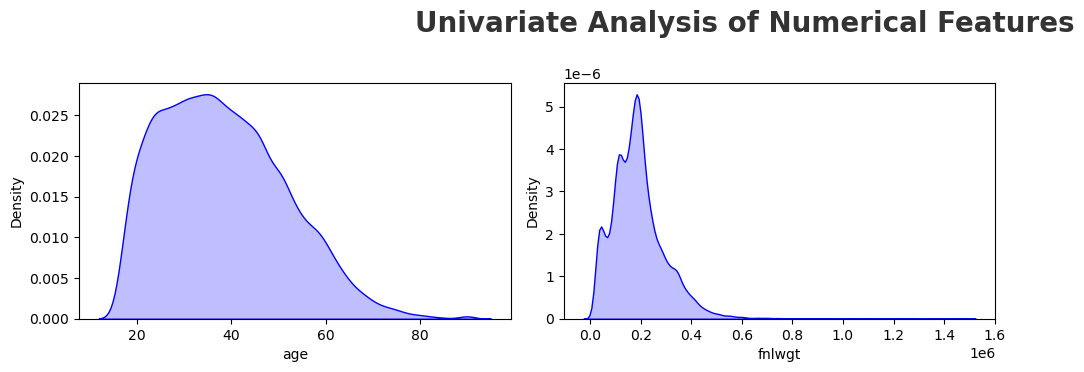

In [54]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_col[i]],shade=True, color='b')
    plt.xlabel(num_col[i])
    plt.tight_layout()

In [55]:
#categorical columns
cat_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat_col.append(i)
        
cat_col        

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

<Figure size 640x480 with 0 Axes>

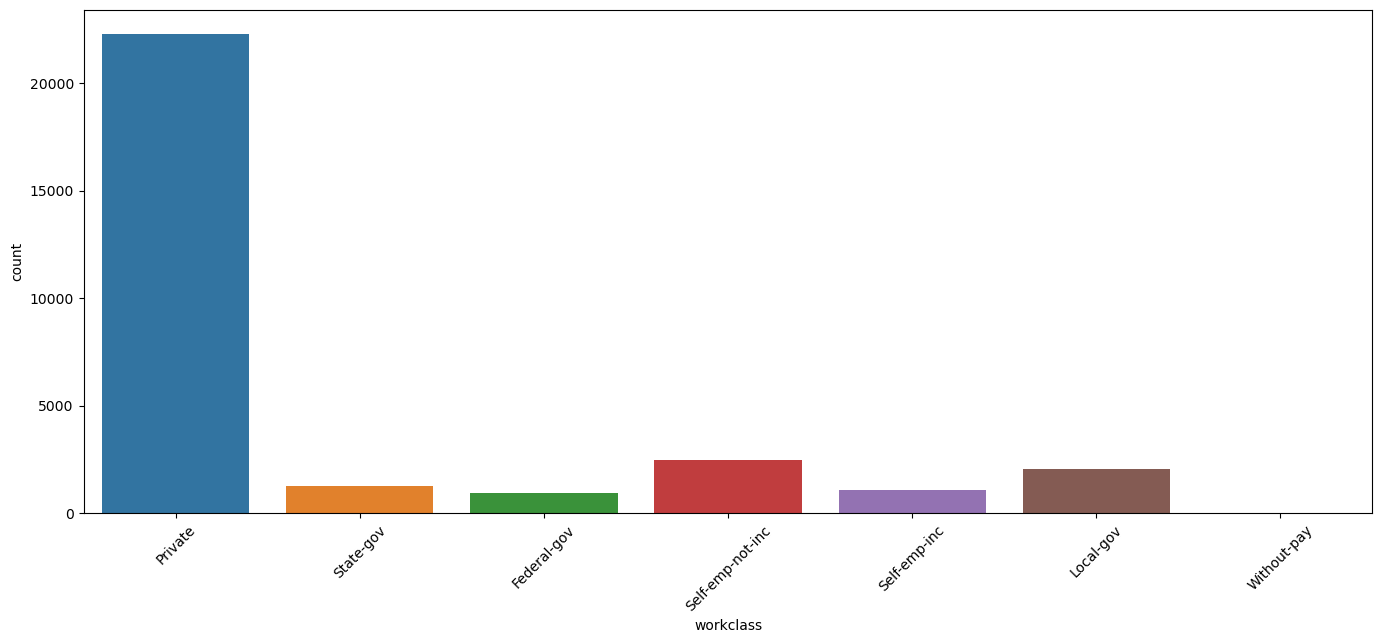

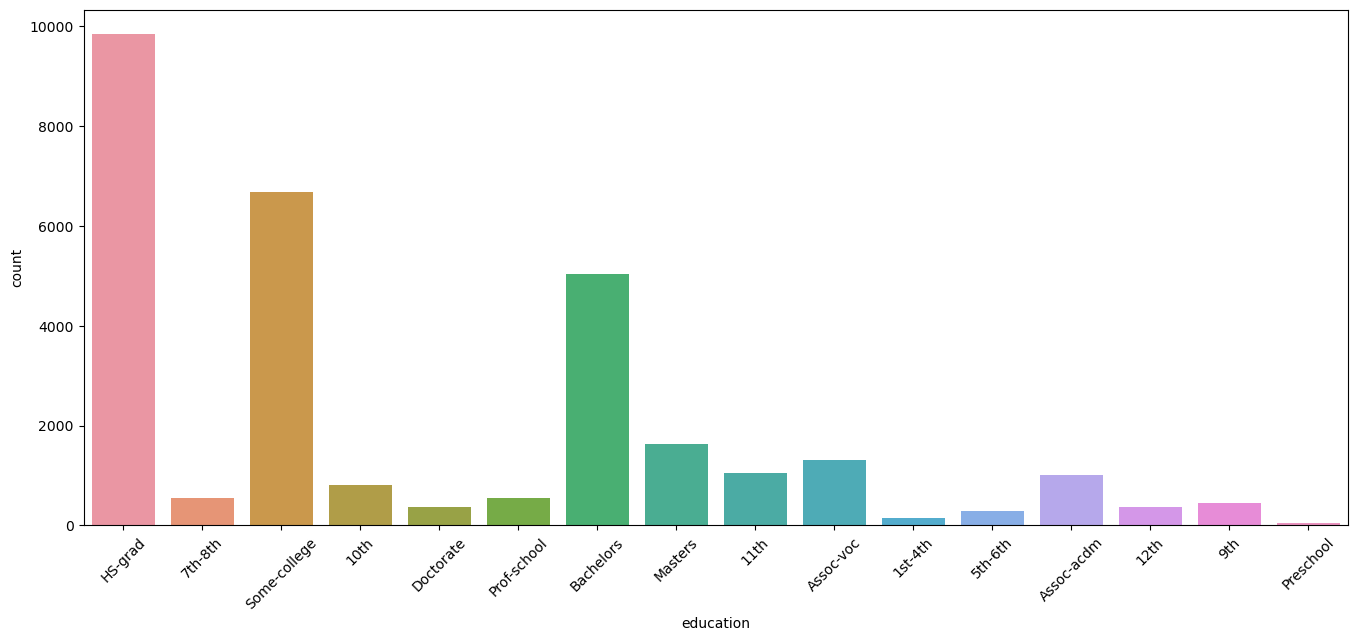

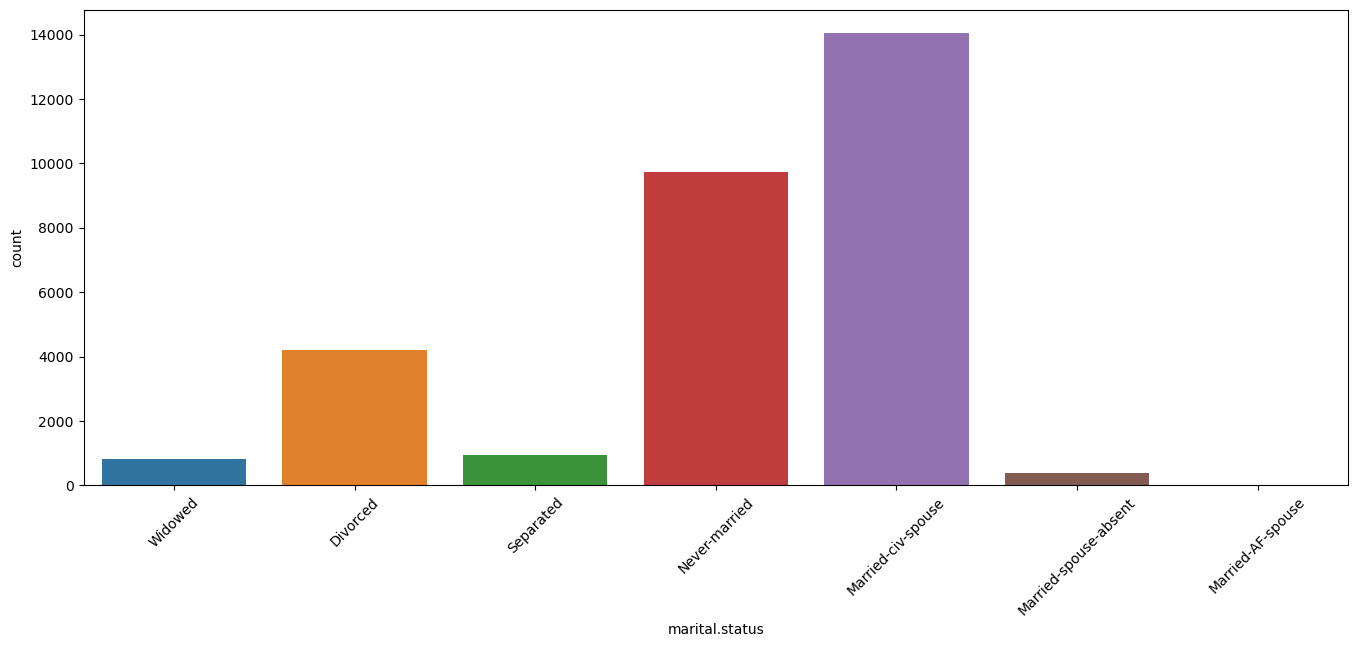

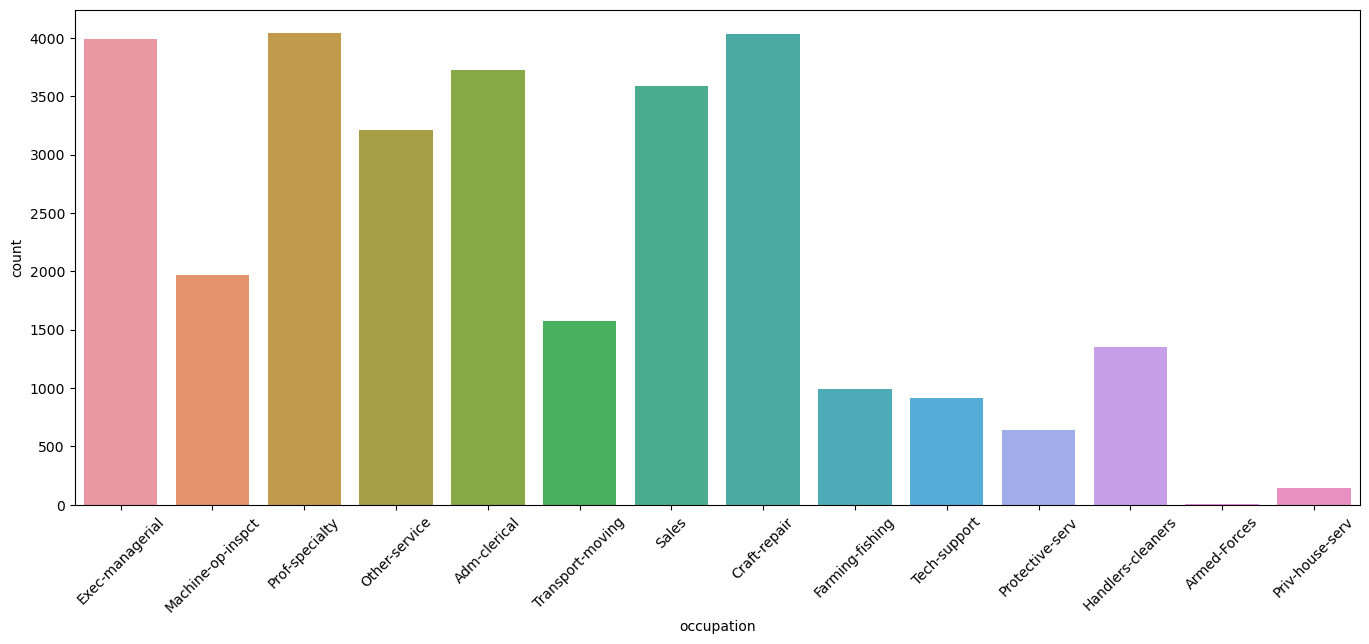

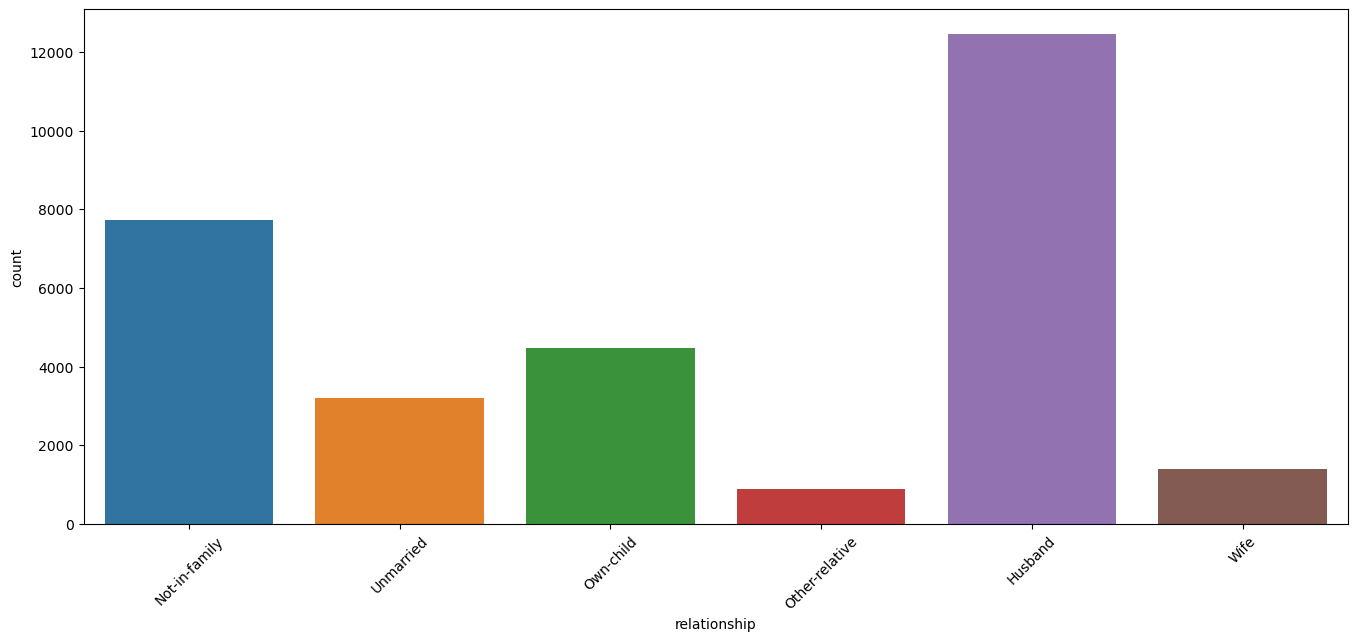

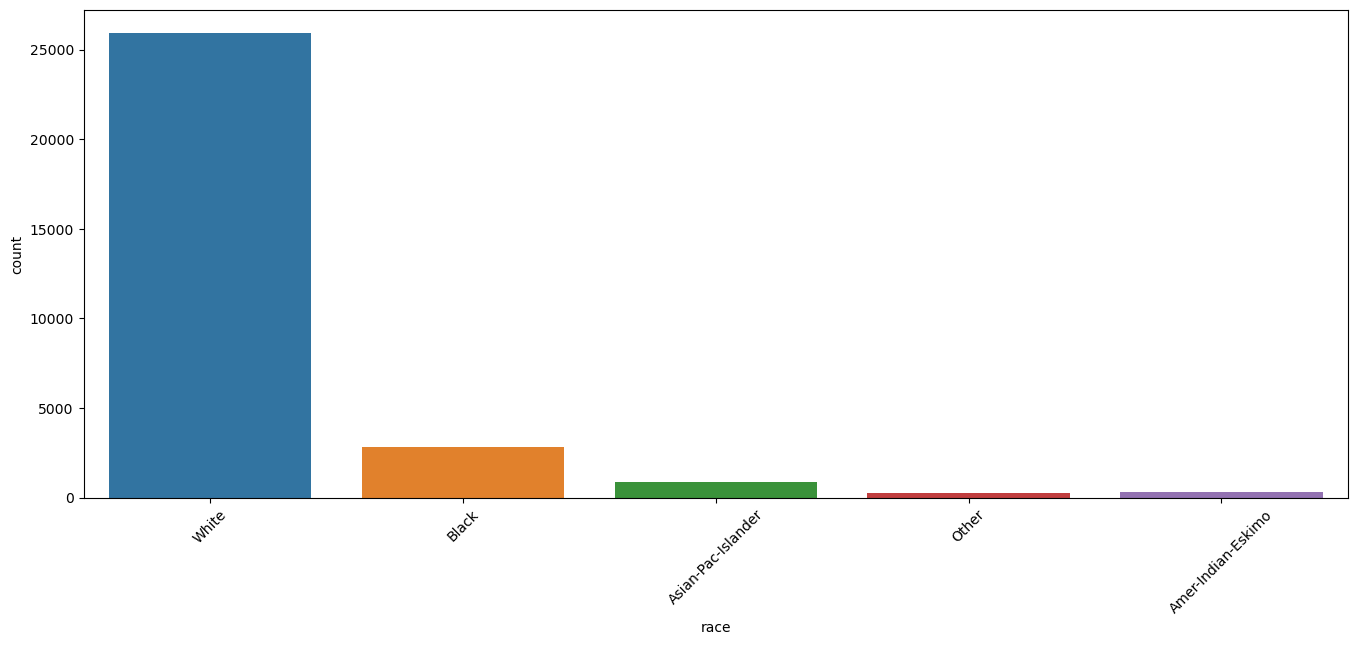

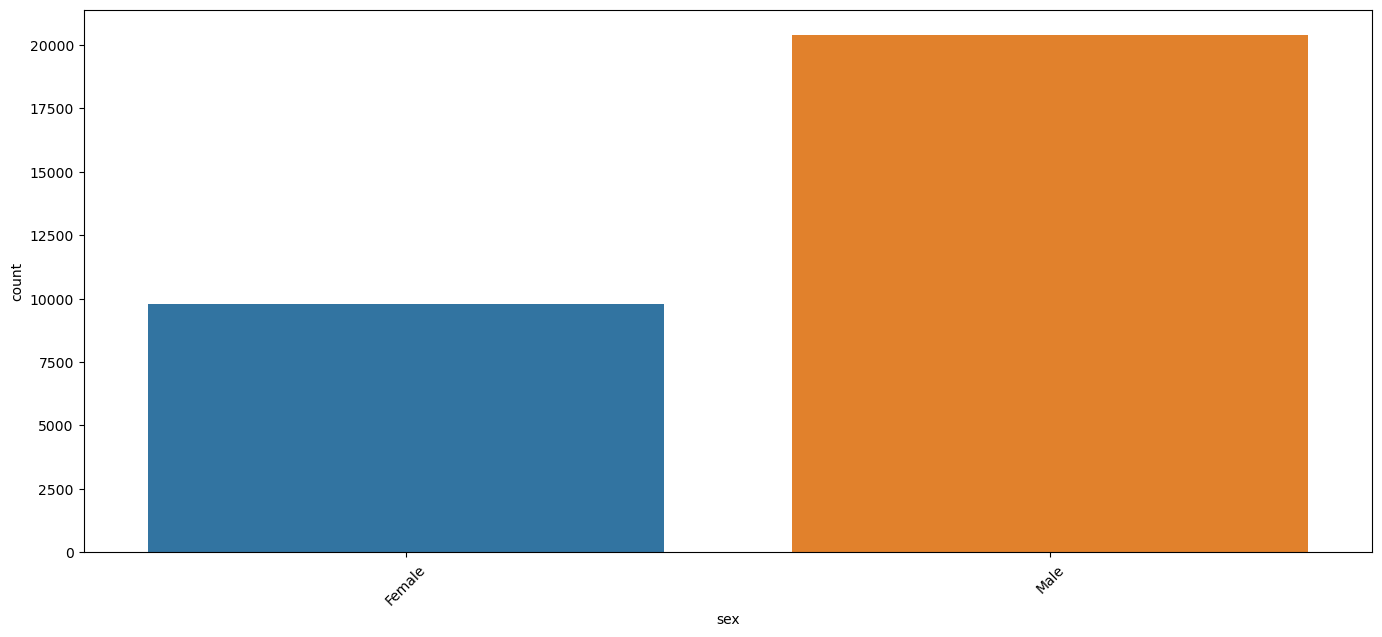

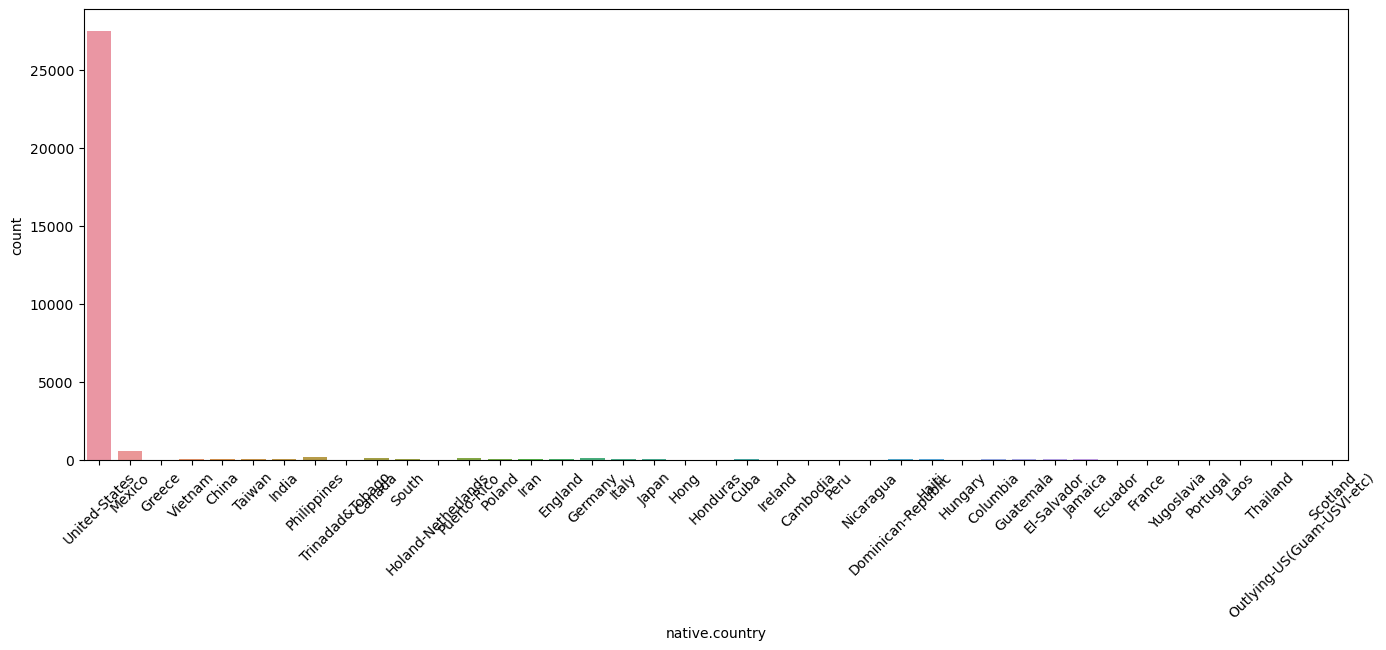

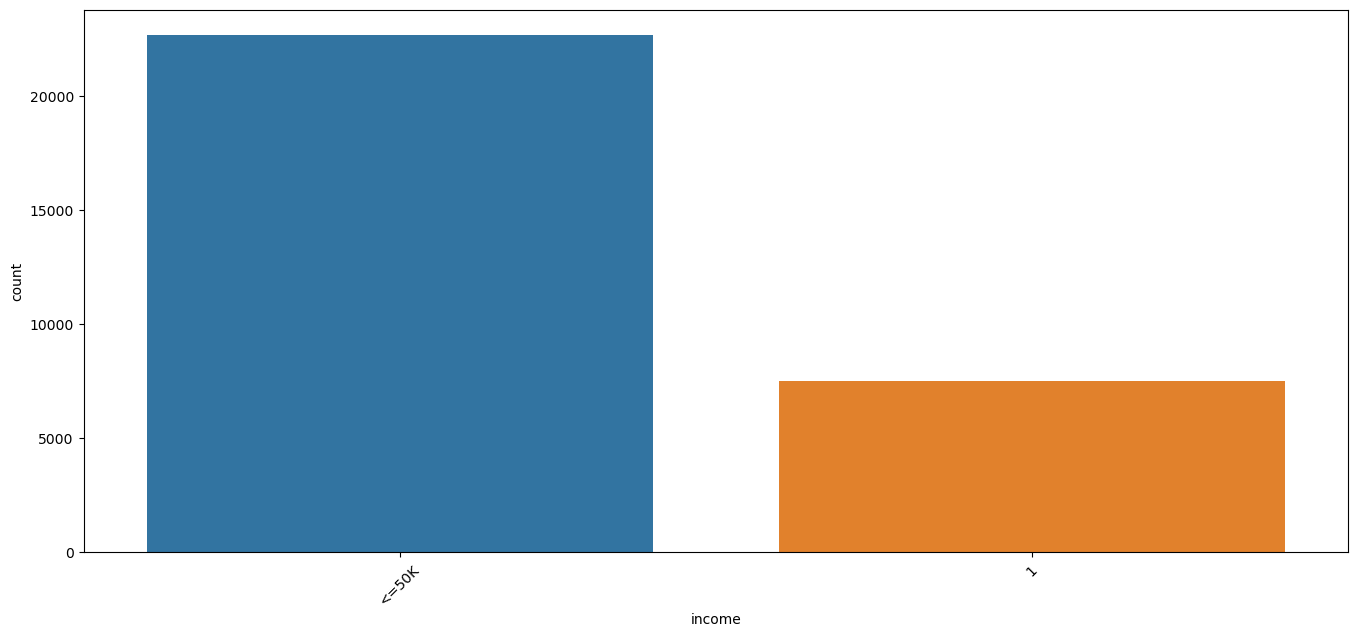

In [56]:
# categorical columns
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_col)):
    plt.figure(figsize=(40, 50))
    plt.subplot(8, 3, i+1)
    sns.countplot(x=df[cat_col[i]])
    plt.xlabel(cat_col[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [57]:
df[(list(df.columns)[1:])].corr()

,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
fnlwgt,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education.num,-0.044992,1.000000,0.124416,0.079646,0.152522
capital.gain,0.000422,0.124416,1.000000,-0.032229,0.080432
capital.loss,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours.per.week,-0.022886,0.152522,0.080432,0.052417,1.000000


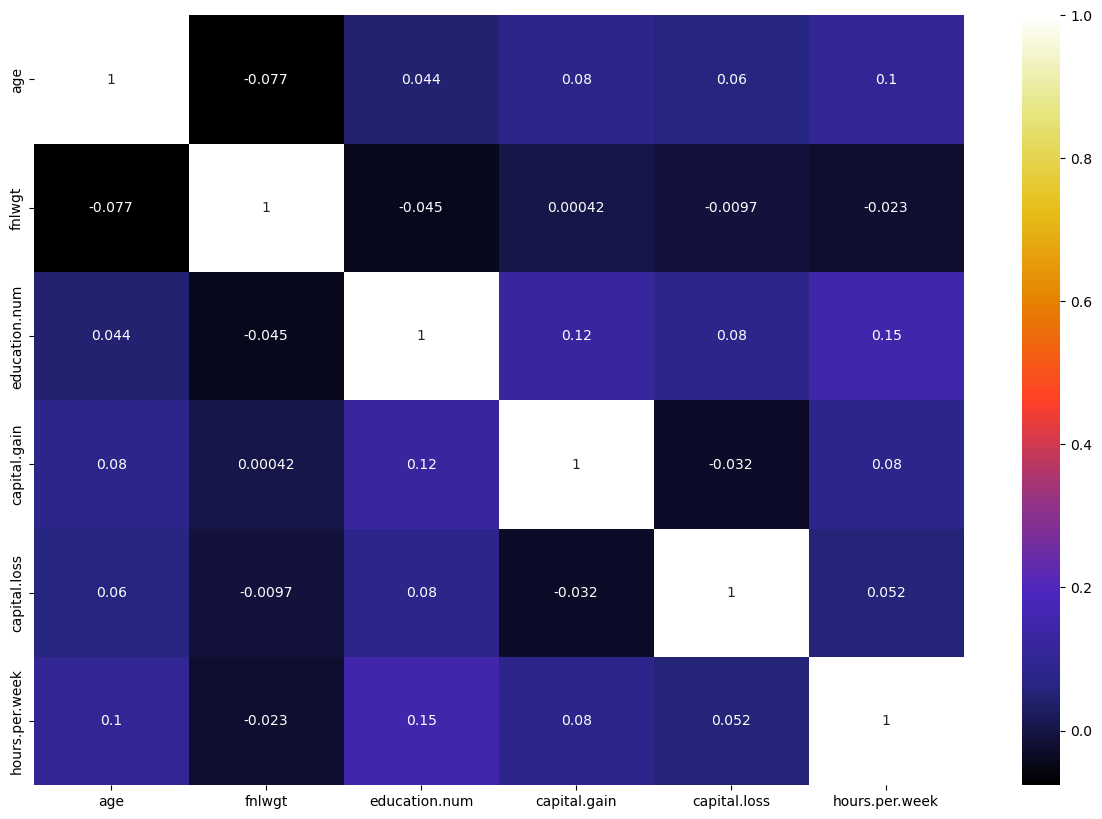

In [58]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

In [59]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in df[cat_col]:
    if chi2_contingency(pd.crosstab(df['income'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_col, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,workclass,Reject Null Hypothesis
1,education,Reject Null Hypothesis
2,marital.status,Reject Null Hypothesis
3,occupation,Reject Null Hypothesis
4,relationship,Reject Null Hypothesis
5,race,Reject Null Hypothesis
6,sex,Reject Null Hypothesis
7,native.country,Reject Null Hypothesis
8,income,Reject Null Hypothesis


KeyError: 0

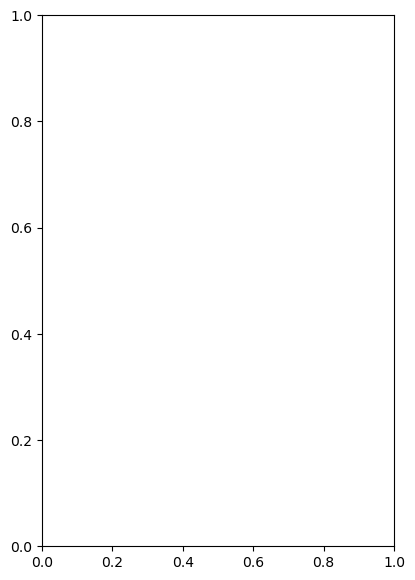

In [60]:
plt.figure(figsize=(10,40))
for i in range(0,len(num_col)):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data=df[num_col[i]])
    plt.xlabel(num_col[i])

In [61]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


## function to remove outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = dataframe[variable].mean()
        dataframe.loc[(dataframe[variable] > up_limit), variable] = dataframe[variable].mean()

In [62]:
replace_with_thresholds(df,num_col)

KeyError: 0

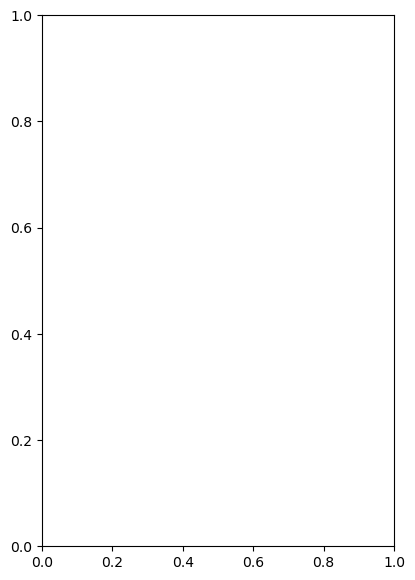

In [63]:
plt.figure(figsize=(10,40))
for i in range(0,len(num_col)):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data=df[num_col[i]])
    plt.xlabel(num_col[i])

In [64]:
new_df = df.copy()

In [65]:
new_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,38.437902,Private,132870.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54.000000,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41.000000,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34.000000,Private,216864.0,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38.000000,Private,150601.0,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [67]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
#data.drop('income',axis=1,inplace=True)

from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
data_categorical = data[categorical_columns]
data_categorical.head()


data_encoded = encoder.fit_transform(data_categorical)

a = pd.DataFrame(data_encoded,columns=['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'country','income'])
b = data[['age','hours.per.week']]
#c=data['hours.per.week']
new_df = pd.concat([b,a],axis=1)

In [68]:
new_df

,age,hours.per.week,workclass,education,marital-status,occupation,relationship,race,sex,country,income
0,90,40,0.0,11.0,6.0,0.0,1.0,4.0,0.0,39.0,0.0
1,82,18,4.0,11.0,6.0,4.0,1.0,4.0,0.0,39.0,0.0
2,66,40,0.0,15.0,6.0,0.0,4.0,2.0,0.0,39.0,0.0
3,54,40,4.0,5.0,0.0,7.0,4.0,4.0,0.0,39.0,0.0
4,41,40,4.0,15.0,5.0,10.0,3.0,4.0,0.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,40,4.0,15.0,4.0,11.0,1.0,4.0,1.0,39.0,0.0
32557,27,38,4.0,7.0,2.0,13.0,5.0,4.0,0.0,39.0,0.0
32558,40,40,4.0,11.0,2.0,7.0,0.0,4.0,1.0,39.0,1.0
32559,58,40,4.0,11.0,6.0,1.0,4.0,4.0,0.0,39.0,0.0


In [69]:
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()


#for i in cat_col:
    #new_df[i]= label_encoder.fit_transform(new_df[i])

In [70]:
X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=7,test_size=0.33)

In [72]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21815, 10)
(21815,)
(10746, 10)
(10746,)


In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
model1.score(X_train,y_train)

0.7615860646344259

In [77]:
pred1 = model1.predict(X_test)

In [78]:
accuracy_score(y_test, pred1)

0.7644705006514052

In [79]:
from sklearn.ensemble import RandomForestClassifier
model2 =RandomForestClassifier()
model2.fit(X_train , y_train)

RandomForestClassifier()

In [80]:
model2.score(X_train,y_train)

0.9723584689433876

In [81]:
pred2 = model2.predict(X_test)

In [82]:
accuracy_score(y_test,pred2)

0.8208635771449841

In [83]:
user_input=np.array([[39,40,7.0,9.0,4.0,1.0,1.0,4.0,1.0,39.0]])
prediction = model2.predict(user_input)
if prediction ==0:
    print("income is <=50k")
else:
    print("income is >50k")

income is <=50k
